# Q5 Assumed Density Filtering
### Q5.1 Pre-processing and variables

In [1]:
# Q5 Assumed density filtering
# import preprocessing function and Gibbs sampler function
from Preprocessing_serieA_function import preprocess_serieA_no_draws
from Gibbs_sampler_function import gibbs_sampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from df_to_dic_script import df_to_dictionary as df_to_dic

# load data
data = pd.read_csv('SerieA_dataset.csv')
print(data.head())

# preprocess data
data_preprocessed = preprocess_serieA_no_draws(data, dataset_name='SerieA', remove_draws=False)
print('\nShape of preprocessed data: ', data_preprocessed.shape)

# shuffle data
shuffled_data = data_preprocessed.copy()
shuffled_data = shuffled_data.sample(frac=1).reset_index(drop=True)

# Create team dictionary
teams_dictionary = df_to_dic(data_preprocessed)
shuffled_teams_dictionary = df_to_dic(shuffled_data)


   yyyy-mm-dd  HH:MM     team1     team2  score1  score2
0  2018-08-18  18:00    Chievo  Juventus       2       3
1  2018-08-18  20:30     Lazio    Napoli       1       2
2  2018-08-19  18:00    Torino      Roma       0       1
3  2018-08-19  20:30  Sassuolo     Inter       1       0
4  2018-08-19  20:30     Parma   Udinese       2       2
      team1     team2  score_diff  y
0    Chievo  Juventus          -1 -1
1     Lazio    Napoli          -1 -1
2    Torino      Roma          -1 -1
3  Sassuolo     Inter           1  1
4     Parma   Udinese           0  0

Shape of preprocessed data:  (380, 4)


# Q.6
### Q6.1 prediction function

### Q5.2 Assumed Density Filtering (ADF) function

## Q5 & Q6: Run functions

In [5]:
# Run ADF on data
# Assumed density filtering (ADF)
from ADF_script import ADF

dic1, predictions1= ADF(teams_dictionary, data_preprocessed,False)

# Run ADP on shuffled data
dic_shuffled, predictions_shuffled = ADF(shuffled_teams_dictionary, shuffled_data,False)


Current game: 0: team1 Chievo with prior skill 22.2 and variance 0.00 vs team2 Juventus with skill 30.9 and variance 0.00
Prediction: -1, result : -1, score difference: -1
Updated skill team1: 22.2 and variance 0.00 vs team2: 30.9 and variance 0.00

Current game: 30: team1 Frosinone with prior skill 22.2 and variance 0.01 vs team2 Sampdoria with skill 24.5 and variance 0.13
Prediction: -1, result : -1, score difference: -5
Updated skill team1: 22.1 and variance 0.00 vs team2: 25.6 and variance 0.02

Current game: 60: team1 Juventus with prior skill 30.9 and variance 0.00 vs team2 Napoli with skill 30.1 and variance 0.02
Prediction: 1, result : 1, score difference: 2
Updated skill team1: 31.0 and variance 0.00 vs team2: 29.2 and variance 0.04

Current game: 90: team1 Empoli with prior skill 22.5 and variance 0.01 vs team2 Juventus with skill 30.9 and variance 0.00
Prediction: -1, result : -1, score difference: -1
Updated skill team1: 22.4 and variance 0.00 vs team2: 31.0 and variance 0

# Results:
### Team ranking changes after shuffle
#### prediction rate of one-step-head = 0.64, better than random guessing(0.5)

In [6]:
# Create dataframe of means and variances an sort by means
from numpy import sign
from sklearn.metrics import accuracy_score
teams_df = pd.DataFrame(dic1, index=['mean', 'variance']).T
teams_df = teams_df.sort_values(by=['mean'], ascending=False)
print('Teams after the season, no shuffle:')
print(teams_df)

# Remove draws from data (y=0)
data_preprocessed = data_preprocessed[data_preprocessed['score_diff'] != 0]
shuffled_data = shuffled_data[shuffled_data['score_diff'] != 0]

# remove None values from predictions
predictions1 = [x for x in predictions1 if x is not None]
predictions_shuffled = [x for x in predictions_shuffled if x is not None]

# Calculate prediction rate
from sklearn.metrics import accuracy_score
y_true = sign(data_preprocessed['score_diff']).tolist()
prediction_rate = accuracy_score(y_true, predictions1)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate}')

# prediction rate of last 60 games
y_true_last_60 = y_true[-60:]
predictions_last_60 = predictions1[-60:]
prediction_rate_last_60 = accuracy_score(y_true_last_60, predictions_last_60)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60}')


# create dataframe of shuffled means and variances
teams_df_shuffled = pd.DataFrame(dic_shuffled, index=['mean', 'variance']).T
teams_df_shuffled = teams_df_shuffled.sort_values(by=['mean'], ascending=False)
print('\nTeams after the season, with shuffle:')
print(teams_df_shuffled)

# Calculate prediction rate
y_true_shuffled = sign(shuffled_data['score_diff']).tolist()
prediction_rate_shuffled = accuracy_score(y_true_shuffled, predictions_shuffled)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate_shuffled}')

# prediction rate of last 60 games
y_true_last_60_shuffled = y_true_shuffled[-60:]
predictions_last_60_shuffled = predictions_shuffled[-60:]
prediction_rate_last_60_shuffled = accuracy_score(y_true_last_60_shuffled, predictions_last_60_shuffled)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60_shuffled}')


Teams after the season, no shuffle:
                 mean  variance
Juventus    30.473860  0.005128
Atalanta    29.224077  0.004601
Roma        28.927068  0.018182
Milan       28.083108  0.012724
Torino      28.012364  0.019218
Bologna     27.188862  0.015323
Inter       26.980865  0.007028
Napoli      26.746571  0.117802
Lazio       26.024596  0.017937
Sampdoria   25.984526  0.423629
Udinese     25.549447  0.010202
Empoli      25.359378  0.100541
Sassuolo    24.792985  0.008439
Cagliari    23.713579  0.027375
Parma       23.486451  0.012772
Spal        23.394230  0.025725
Genoa       23.145259  0.007438
Chievo      22.500557  0.003705
Fiorentina  22.337848  0.012435
Frosinone   22.335379  0.007590

Prediction rate of One-Step-Ahead prediction: 0.6801470588235294

Prediction rate of One-Step-Ahead prediction for last 60 games: 0.6666666666666666

Teams after the season, with shuffle:
                 mean  variance
Sampdoria   27.730566  0.125130
Juventus    27.709754  0.015055
Napoli 

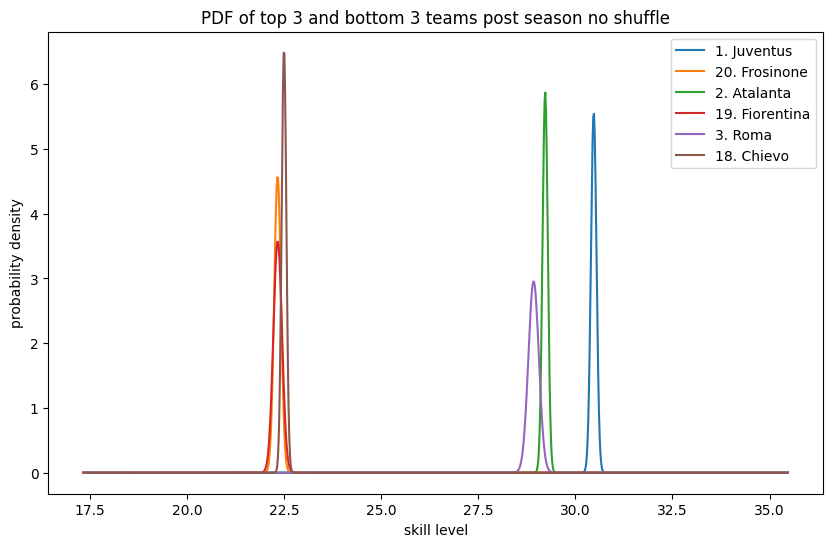

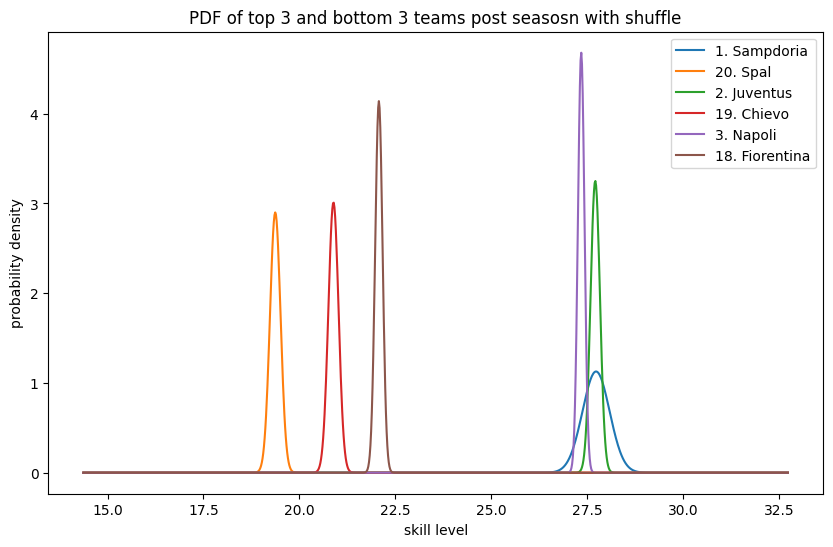

In [7]:
# Plot the pdf of the three top teams and the three bottom teams

plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df['mean'])-5, max(teams_df['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df.iloc[i, 0], np.sqrt(teams_df.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df.iloc[-i-1, 0], np.sqrt(teams_df.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df)-i}. {teams_df.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams post season no shuffle')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()

# Plot the pdf of the three top teams and the three bottom teams after shuffle

plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df_shuffled['mean'])-5, max(teams_df_shuffled['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df_shuffled.iloc[i, 0], np.sqrt(teams_df_shuffled.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df_shuffled.iloc[-i-1, 0], np.sqrt(teams_df_shuffled.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df_shuffled.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df_shuffled)-i}. {teams_df_shuffled.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams post seasosn with shuffle')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()
